In [1]:
import cv2,os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'mm': 0, 'nn': 1, 'pm': 2}
['mm', 'nn', 'pm']
[0, 1, 2]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

np.save('data',data)
np.save('target',new_target)

Using TensorFlow backend.


In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(150,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))
#The Final layer with three outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 150)       270150    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 150)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 100)      

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=25,callbacks=[checkpoint],validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 648 samples, validate on 162 samples
Epoch 1/25
648/648 [==============================] - 164s 254ms/step - loss: 0.6126 - accuracy: 0.7377 - val_loss: 0.0669 - val_accuracy: 0.9938
Epoch 2/25
648/648 [==============================] - 161s 248ms/step - loss: 0.0765 - accuracy: 0.9769 - val_loss: 0.1336 - val_accuracy: 0.9568
Epoch 3/25
648/648 [==============================] - 159s 246ms/step - loss: 0.0267 - accuracy: 0.9907 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 4/25
648/648 [==============================] - 159s 246ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.1975e-04 - val_accuracy: 1.0000
Epoch 5/25
648/648 [==============================] - 160s 247ms/step - loss: 2.5160e-04 - accuracy: 1.0000 - val_loss: 1.4233e-05 - val_accuracy: 1.0000
Epoch 6/25
648/648 [==============================] - 159s 245ms/step - loss: 5.2536e-05 - accuracy: 1.0000 - val_loss: 1.3079e-05 - val_accuracy: 1.0000
Epoch 7/25

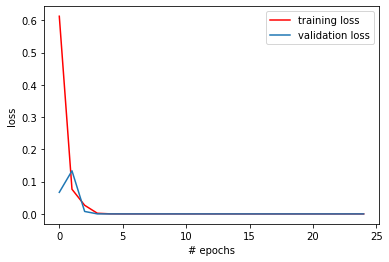

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

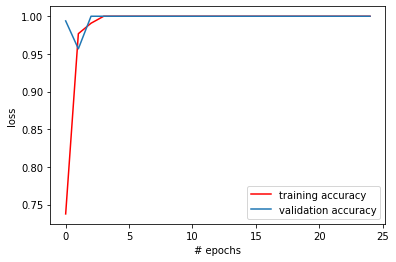

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

91/91 [==============================] - 7s 78ms/step
[6.284762147575688e-06, 1.0]


In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np

Using TensorFlow backend.


In [2]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier(r'C:\Users\User\Desktop\finalproject\Face Mask Detection\haarcascade_frontalface_default.xml')
#face_clsfr=cv2.CascadeClassifier(r'C:\Users\User\Desktop\FMD project\haarcascade_eye.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'manjunath',1:'nags',2:'praj'}
color_dict={0:(0,255,0),1:(0,0,255),2:(255,0,0)}
#labels_dict={0:'MASK',1:'surgical_mask',2:'without_mask'}
#color_dict={0:(0,255,0),1:(0,0,255),2:(0,0,255)}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
model = load_model('model-022.model')

face_clsfr=cv2.CascadeClassifier(r'C:\Users\User\Desktop\FRM\haarcascade_eye.xml')
#face_clsfr=cv2.CascadeClassifier(r'C:\Users\User\Desktop\FMD project\haarcascade_eye.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'manjunath',1:'nags',2:'praj'}
color_dict={0:(0,255,0),1:(0,0,255),2:(255,0,0)}
#labels_dict={0:'MASK',1:'surgical_mask',2:'without_mask'}
#color_dict={0:(0,255,0),1:(0,0,255),2:(0,0,255)}

In [3]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [13]:
import cv2
img_size=100
img = cv2.imread(r'C:\Users\User\Desktop\FRM\n49.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
#Coverting the image into gray scale
resized=cv2.resize(gray,(img_size,img_size))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)

label=np.argmax(result,axis=1)[0]
faces=face_clsfr.detectMultiScale(gray,1.3,5)  
for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
       

        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        #changes
        #cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label1],2)
        #cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label1],-1)
        
       

        
   
        
cv2.destroyAllWindows()
source.release()

cv2.imshow('Detection',img)
#key=cv2.waitKey(0)
cv2.waitKey(0)
cv2.destroyAllWindows()
source.release()

In [7]:
x= 30
y= 22
w= 309
h= 309


In [8]:
import cv2
img_size=100
img = cv2.imread(r'C:\Users\User\Desktop\FRM\n49.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
#Coverting the image into gray scale
resized=cv2.resize(gray,(img_size,img_size))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
#result=model.predict(reshaped)
face_img=gray[y:y+w,x:x+w]
resized=cv2.resize(face_img,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)


label=np.argmax(result,axis=1)[0]
cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
                    #changes
                    #cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label1],2)
                    #cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label1],-1)
        
       

        
   
        
cv2.destroyAllWindows()
source.release()

cv2.imshow('Detection',img)
#key=cv2.waitKey(0)
cv2.waitKey(0)
cv2.destroyAllWindows()
source.release()